In [1]:
import pandas as pd
import numpy as np
ds = pd.read_csv("videoGames.csv")


In [2]:
ds.isnull()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
16715,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
16716,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
16717,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True


In [3]:
ds.isnull().any()

Name                True
Platform           False
Year_of_Release     True
Genre               True
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Developer           True
Rating              True
dtype: bool

In [4]:
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew 
%matplotlib inline
ds = ds.drop(ds[(ds['Critic_Score']>60) & (ds['Global_Sales']>60)].index)

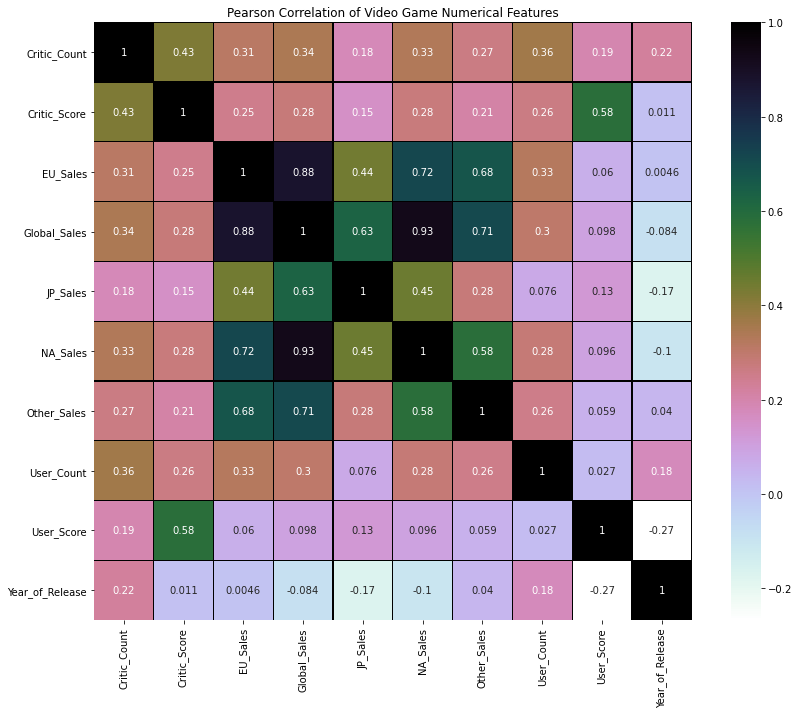

In [5]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in ds.iteritems():
    if type(colvalue[2]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = ds.columns.difference(str_list) 
# Create Dataframe containing only numerical features
ds_num = ds[num_list]
f, ax = plt.subplots(figsize=(14, 11))
plt.title('Pearson Correlation of Video Game Numerical Features')
# Draw the heatmap using seaborn
sns.heatmap(ds_num.astype(float).corr(),linewidths=0.25,vmax=1.0, 
            square=True, cmap="cubehelix_r", linecolor='k', annot=True)

In [6]:
data_na = (ds.isnull().sum() / len(ds)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio
User_Count,54.605814
User_Score,54.605814
Critic_Count,51.333892
Critic_Score,51.333892
Rating,40.489293
Developer,39.615983
Year_of_Release,1.609044
Publisher,0.323005
Genre,0.011963
Name,0.011963


In [7]:
print(pd.value_counts(ds["Platform"]))

PS2     2161
DS      2152
PS3     1331
Wii     1319
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64


In [8]:
ds = ds[(ds['Platform'] == 'PS3') | (ds['Platform'] == 'PS4') | (ds['Platform'] == 'X360') | (ds['Platform'] == 'XOne') | (ds['Platform'] == 'Wii') | (ds['Platform'] == 'WiiU') | (ds['Platform'] == 'PC')]
print(pd.value_counts(ds["Platform"]))

#Let's see the shape of the data again
print(ds.shape)

#Lets see the missing ratios again
data_na = (ds.isnull().sum() / len(ds)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

PS3     1331
Wii     1319
X360    1262
PC       974
PS4      393
XOne     247
WiiU     147
Name: Platform, dtype: int64
(5673, 16)


,Missing Ratio
Critic_Count,37.493390
Critic_Score,37.493390
User_Count,34.584876
User_Score,34.584876
Rating,23.761678
Developer,21.716905
Year_of_Release,1.868500
Publisher,0.229156


In [9]:
ds = ds.dropna(subset=['Critic_Score'])

#Let's see the shape of the data again
print(ds.shape)

#Lets see the missing ratios again
data_na = (ds.isnull().sum() / len(ds)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

(3546, 16)


,Missing Ratio
User_Count,5.019741
User_Score,5.019741
Rating,2.002256
Year_of_Release,2.002256
Developer,0.084602
Publisher,0.084602


In [10]:
ds['Publisher'] = ds['Publisher'].fillna(ds['Publisher'].mode()[0])
ds['Developer'] = ds['Developer'].fillna(ds['Developer'].mode()[0])
ds['Rating'] = ds['Rating'].fillna(ds['Rating'].mode()[0])
ds['Year_of_Release'] = ds['Year_of_Release'].fillna(ds['Year_of_Release'].median())
#There's "tbd" values in the mix here which we need to handle first
ds['User_Score'] = ds['User_Score'].replace('tbd', None)

#Now we can handle the N/A's appropriately
ds['User_Score'] = ds['User_Score'].fillna(ds['User_Score'].median())

ds['User_Count'] = ds['User_Count'].fillna(ds['User_Count'].median())



In [11]:
data_na = (ds.isnull().sum() / len(ds)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# App: Using Label Encoder change the type from object to int64
ds['Platform'] = le.fit_transform(ds['Platform'])
ds['Rating'] = le.fit_transform(ds['Rating'])

In [13]:
ds = ds.drop(['Name', 'Publisher', 'Developer', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)

In [14]:
cols = ['Platform', 'Year_of_Release', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating']
X = ds[list(cols)].values
Y = ds['Genre'].values


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

#Let's check the shape of the split data as a precaution
print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (2659, 8)
Y_train shape: (2659,)
X_test shape: (887, 8)
Y_test shape: (887,)


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
  
X_train = sc.transform(X_train) 
X_test = sc.transform(X_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

y_pred=clf.predict(X_test)

In [18]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.4047350620067644


In [19]:
clf.predict([[3, 1, 5, 2, 6, 1, 4, 2]])

array(['Action'], dtype=object)

In [32]:
columns = ['Platform', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating']
X1 = ds[list(columns)].values
Y1 = ds['Genre'].values


In [33]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, random_state=42)

#Let's check the shape of the split data as a precaution
print("X_train shape: {}".format(X1_train.shape))
print("Y_train shape: {}".format(Y1_train.shape))

print("X_test shape: {}".format(X1_test.shape))
print("Y_test shape: {}".format(Y1_test.shape))

X_train shape: (2659, 7)
Y_train shape: (2659,)
X_test shape: (887, 7)
Y_test shape: (887,)


In [40]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf1=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf1.fit(X1_train,Y1_train)

# prediction on test set
y1_pred=clf1.predict(X1_test)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y1_test, y1_pred))

Accuracy: 0.41149943630214203
